C:\Users\show brothers\AppData\Local\Temp\ipykernel_26792\73224835.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


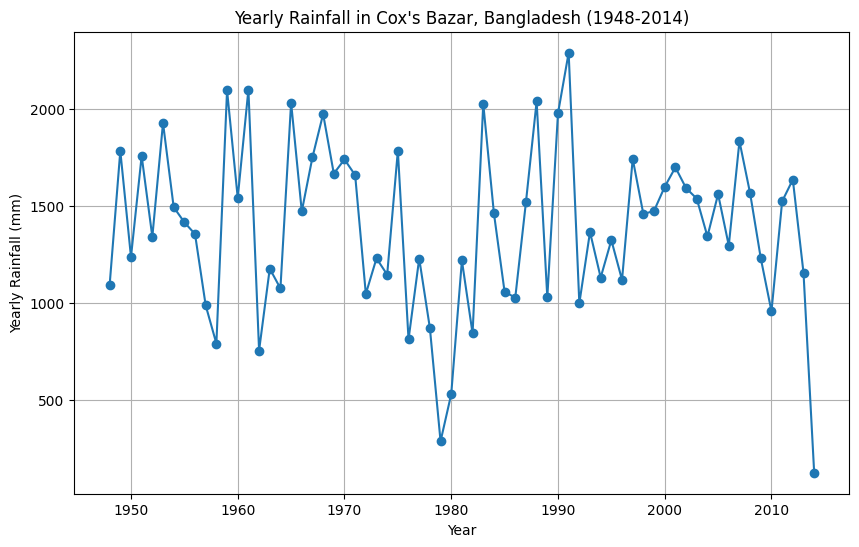

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

rainfall_data = 'data/rainfall_modified_data_bangladesh_1948_to_2014.csv'

# Read the CSV file
df = pd.read_csv(rainfall_data)

# Get unique values from a specific column
cox_rainfall = df[df['Station'] == "Cox's Bazar"].copy()

# Calculate the annual rainfall by summing up monthly totals
cox_rainfall['Yearly Rainfall'] = cox_rainfall[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].sum(axis=1)

# Group by year and sum the rainfall
yearly_rainfall = cox_rainfall.groupby('Year')['Yearly Rainfall'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title("Yearly Rainfall in Cox's Bazar, Bangladesh (1948-2014)")
plt.grid(True)
plt.show()

In [16]:
import pandas as pd

# Load the customized daily rainfall data
df = pd.read_csv('data/customized_daily_rainfall_data.csv')

# Filter data for Cox's Bazar from the year 2000 onwards
df = df[(df['Year'] >= 2000) & (df['Station'] == 'CoxsBazar')]

# Pivot the data to have columns for each day of the month
daily_rainfall_from2000 = df.pivot_table(index=['Year', 'Month'], columns='Day', values='Rainfall', fill_value=0)

# Calculate the total monthly rainfall
daily_rainfall_from2000['MonthlyRainfall'] = daily_rainfall_from2000.sum(axis=1)

# Reset the index to turn 'Year' and 'Month' into columns
daily_rainfall_from2000.reset_index(inplace=True)

# Ensure all days from 1 to 31 are present as columns
for day in range(1, 32):
    if day not in daily_rainfall_from2000.columns:
        daily_rainfall_from2000[day] = 0

# Reorder columns to match the desired format
columns = ['Year', 'Month'] + list(range(1, 32)) + ['MonthlyRainfall']
daily_rainfall_from2000 = daily_rainfall_from2000[columns]

# # Save the new DataFrame to a CSV file
# daily_rainfall_from2000.to_csv('flood-analysis/data/customized_daily_rainfall_data_formatted.csv', index=False)

# Display the new DataFrame
print(daily_rainfall_from2000)
daily_rainfall_from2000.head()

Day  Year  Month     1     2     3     4     5     6     7    8  ...   23  \
0    2000      1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  1.0   
1    2000      2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
2    2000      3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
3    2000      4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
4    2000      5  16.0   2.0  56.0   0.0  19.0   7.0  10.0  1.0  ...  8.0   
..    ...    ...   ...   ...   ...   ...   ...   ...   ...  ...  ...  ...   
199  2016      8  26.0   0.0   0.0   5.0  15.0  12.0  61.0  5.0  ...  0.0   
200  2016      9  26.0  56.0  30.0  12.0  17.0  38.0   3.0  7.0  ...  6.0   
201  2016     10   0.0   0.0   5.0  49.0   8.0   0.0   0.0  2.0  ...  0.0   
202  2016     11   0.0   0.0   0.0   0.0   9.0  15.0  17.0  0.0  ...  0.0   
203  2016     12   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   

Day     24    25    26    27    28    29    30   31  MonthlyRainfall  
0   

Day,Year,Month,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,MonthlyRainfall
0,2000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
3,2000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,16.0,6.0,4.0,0.0,3.0,0.0,65.0
4,2000,5,16.0,2.0,56.0,0.0,19.0,7.0,10.0,1.0,...,8.0,101.0,76.0,10.0,70.0,18.0,10.0,18.0,0.0,589.0
